このチュートリアルでは、データフォルダの構成の基本を学び、Pythonでニューロイメージングデータをロード、プロット、操作する方法について学ぶ。

## BIDS: Brain Imaging Data Structure

最近オープンデータセットが増えており、ファイルの命名規則やフォルダの構造などを統一するために、BIDSというデータ構造が提案されている。BIDSでは、ファイルはnifti形式（not dicoms）。

pybidsを使ってBIDSデータを触ってみる。まずはBIDSLayoutでデータを読み込むと、データの構造を確認できる。

In [1]:
from bids import BIDSLayout, BIDSValidator
import os

data_dir = '/Users/hidekiizumi/myproject/Localizer'
layout = BIDSLayout(data_dir, derivatives=True) # derivatives=True is to include preprocessed data
layout

/Users/hidekiizumi/miniforge3/lib/python3.9/site-packages/bids/layout/validation.py:153: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


BIDS Layout: ...idekiizumi/myproject/Localizer | Subjects: 94 | Sessions: 0 | Runs: 0

In [2]:
layout.get()[:10]

[<BIDSJSONFile filename='/Users/hidekiizumi/myproject/Localizer/dataset_description.json'>,
 <BIDSJSONFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/dataset_description.json'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/logs/CITATION.bib'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/logs/CITATION.html'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/logs/CITATION.md'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/logs/CITATION.tex'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01.html'>,
 <BIDSJSONFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/anat/sub-S01_desc-brain_mask.json'>,
 <BIDSImageFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/anat/sub-S01_desc-brain_mask.nii.gz'>,
 <BIDSJSONFile filename='/U

In [3]:
# subject idを取得

layout.get(target='subject', return_type='id', scope='derivatives')[:10]

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10']

In [4]:
# subjectのファイル名を取得
# suffixはファイル名から拡張子を除いた末尾につく文字列
# scopeは生データ'raw'か加工済みデータ'derivatives'かを指定

layout.get(target='subject', scope='raw', suffix='bold', return_type='file')[:10]

['/Users/hidekiizumi/myproject/Localizer/sub-S01/func/sub-S01_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S02/func/sub-S02_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S03/func/sub-S03_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S04/func/sub-S04_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S05/func/sub-S05_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S06/func/sub-S06_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S07/func/sub-S07_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S08/func/sub-S08_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S09/func/sub-S09_task-localizer_bold.nii.gz',
 '/Users/hidekiizumi/myproject/Localizer/sub-S10/func/sub-S10_task-localizer_bold.nii.gz']

In [5]:
# 何も引数つけないとデータ説明jsonファイル名を返す

f = layout.get()[0]
f

<BIDSJSONFile filename='/Users/hidekiizumi/myproject/Localizer/dataset_description.json'>

In [6]:
# pathを取得

f.path

'/Users/hidekiizumi/myproject/Localizer/dataset_description.json'

In [7]:
# get_task関数でタスク名を取得
layout.get_task()

['localizer']

Localizerタスクについて見てみよう！

In [12]:
layout.get(task='localizer')[:20]

[<BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/figures/sub-S01_task-localizer_desc-carpetplot_bold.svg'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/figures/sub-S01_task-localizer_desc-compcorvar_bold.svg'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/figures/sub-S01_task-localizer_desc-confoundcorr_bold.svg'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/figures/sub-S01_task-localizer_desc-flirtbbr_bold.svg'>,
 <BIDSFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/figures/sub-S01_task-localizer_desc-rois_bold.svg'>,
 <BIDSJSONFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/func/sub-S01_task-localizer_desc-confounds_regressors.json'>,
 <BIDSDataFile filename='/Users/hidekiizumi/myproject/Localizer/derivatives/fmriprep/sub-S01/func/sub-S01_task-

生データnii形式も加工データもある。

In [13]:
f = layout.get(task='localizer')[0].filename
f

'sub-S01_task-localizer_desc-carpetplot_bold.svg'

In [14]:
layout.to_df()

entity,path,datatype,extension,subject,suffix,task
0,/Users/hidekiizumi/myproject/Localizer/dataset...,NaN,.json,NaN,description,NaN
1,/Users/hidekiizumi/myproject/Localizer/partici...,NaN,.json,NaN,participants,NaN
2,/Users/hidekiizumi/myproject/Localizer/partici...,NaN,.tsv,NaN,participants,NaN
3,/Users/hidekiizumi/myproject/Localizer/phenoty...,NaN,.tsv,NaN,behavioural,NaN
4,/Users/hidekiizumi/myproject/Localizer/phenoty...,NaN,.tsv,NaN,subject,NaN
...,...,...,...,...,...,...
3391,/Users/hidekiizumi/myproject/Localizer/derivat...,NaN,NaN,NaN,NaN,NaN
3392,/Users/hidekiizumi/myproject/Localizer/derivat...,NaN,NaN,NaN,NaN,NaN
3393,/Users/hidekiizumi/myproject/Localizer/derivat...,NaN,NaN,NaN,NaN,NaN
3394,/Users/hidekiizumi/myproject/Localizer/derivat...,NaN,NaN,NaN,NaN,NaN


## Nibabel: Loading neuroimaging data

nibabelと言うライブラリを使って、niiファイルを読み込む。

In [15]:
import nibabel as nib

data = nib.load(layout.get(subject='S01', scope='derivatives', suffix='T1w', return_type='file', extension='nii.gz')[1])


In [16]:
# help 
data?

Type:           Nifti1Image
String form:   
           <class 'nibabel.nifti1.Nifti1Image'>
           data shape (193, 229, 193)
           affine:
           [[   1.    0.    0.  -96 <...> 0. -132.]
           srow_z          : [  0.   0.   1. -78.]
           intent_name     : b''
           magic           : b'n+1'
           
File:           ~/miniforge3/lib/python3.9/site-packages/nibabel/nifti1.py
Docstring:      Class for single file NIfTI1 format image
Init docstring:
Initialize image

The image is a combination of (array-like, affine matrix, header), with
optional metadata in `extra`, and filename / file-like objects
contained in the `file_map` mapping.

Parameters
----------
dataobj : object
   Object containing image data.  It should be some object that returns an
   array from ``np.asanyarray``.  It should have a ``shape`` attribute
   or property
affine : None or (4,4) array-like
   homogeneous affine giving relationship between voxel coordinates and
   world coordinates.

In [17]:
# 神経画像データは3次元データか4次元データ
# dataはnumpyのndarray形式でデータが格納されているから、shapeでデータの形を確認できる
data.shape

(193, 229, 193)

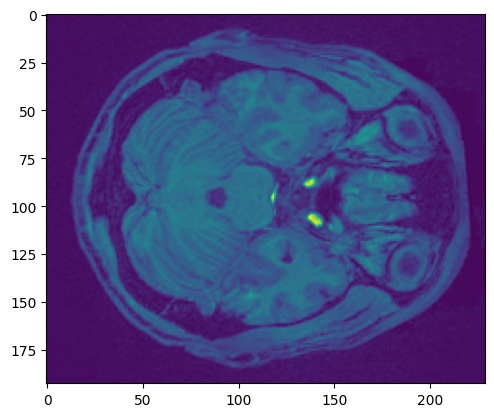

In [18]:
# 可視化

%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data.get_fdata()[:,:,50])

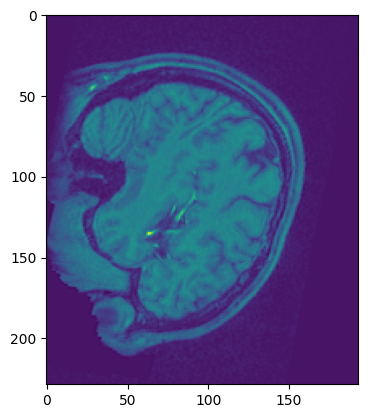

In [19]:
plt.imshow(data.get_fdata()[50,:,:])

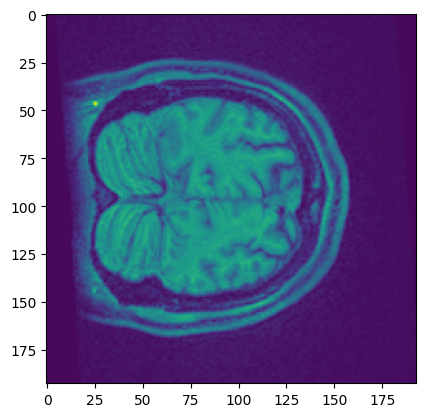

In [20]:
plt.imshow(data.get_fdata()[:,50,:])

In [21]:
# headerからデータにアクセスも可能

header = data.header
print(header)      

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 193 229 193   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.1.12).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.0
qoffset_y       : -132.0
qoffs

In [22]:
# 空間における画像の向きの情報を取得

data.affine

array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -132.],
       [   0.,    0.,    1.,  -78.],
       [   0.,    0.,    0.,    1.]])

## Niliearn: Visualizing neuroimaging data

nilearnと言うライブラリを使って、niiファイルをプロットする。

以降よろしく

# 

header = data.header
print(header)      